In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/blackfriday/BlackFriday.csv


In [34]:
df=pd.read_csv("/kaggle/input/blackfriday/BlackFriday.csv")

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [5]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [6]:
df.dropna()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
13,1000005,P00145042,M,26-35,20,A,1,1,1,2.0,5.0,15665
14,1000006,P00231342,F,51-55,9,A,1,0,5,8.0,14.0,5378
16,1000006,P0096642,F,51-55,9,A,1,0,2,3.0,4.0,13055
...,...,...,...,...,...,...,...,...,...,...,...,...
537549,1004734,P00345842,M,51-55,1,B,1,1,2,8.0,14.0,13082
537551,1004735,P00313442,M,46-50,3,C,3,0,5,6.0,8.0,6863
537562,1004736,P00146742,M,18-25,20,A,1,1,1,13.0,14.0,11508
537571,1004737,P00221442,M,36-45,16,C,1,0,1,2.0,5.0,11852


In [7]:
df['User_ID'].nunique()

5891

In [8]:
df['Product_ID'].nunique()

3623

In [9]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [10]:
df['Occupation'].nunique()

21

In [11]:
df['City_Category'].nunique()

3

In [12]:
df['Purchase'].sum()

5017668378

<Axes: ylabel='Ratio'>

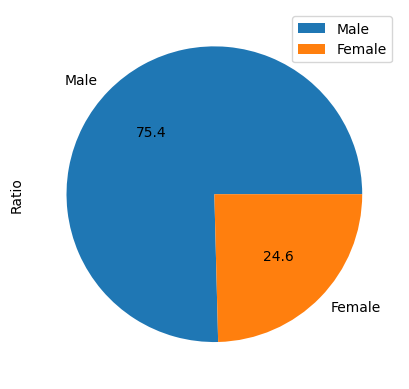

In [13]:
data=pd.DataFrame({'Ratio': [len(df[df['Gender']=='M']),len(df[df['Gender']=='F'])]},index=['Male','Female'])

data.plot.pie(y='Ratio',autopct="%.1f")

<Axes: title={'center': 'Gender Ratio'}>

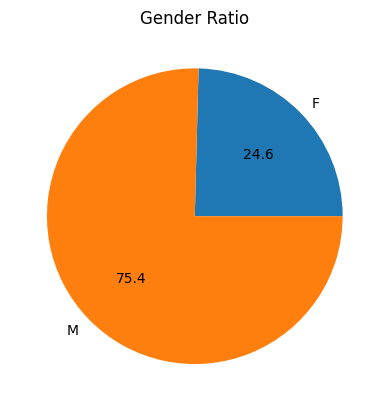

In [14]:
df.groupby('Gender').size().plot(kind="pie",autopct="%.1f",title="Gender Ratio")

<Axes: xlabel='Gender'>

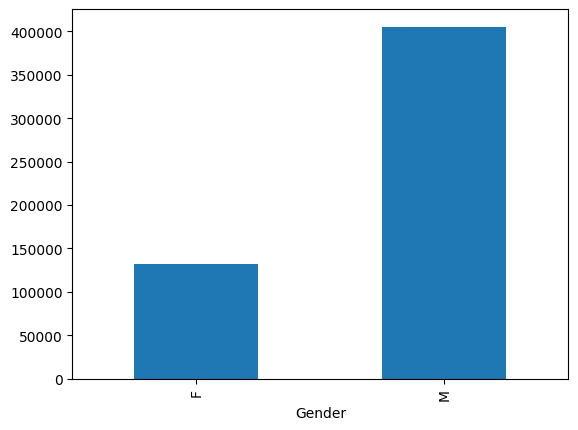

In [15]:
df.groupby('Gender').size().plot(kind="bar")

<Axes: ylabel='Purchase'>

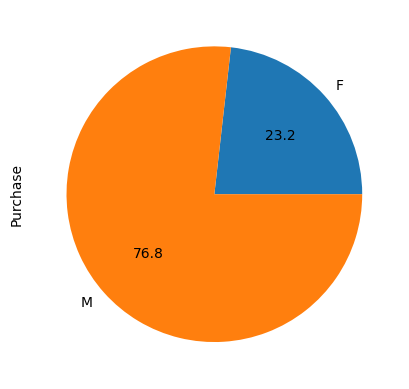

In [16]:
df.groupby('Gender').sum()['Purchase'].plot(kind='pie',autopct="%.1f")

In [17]:
df.groupby('Age').sum()['Purchase']

Age
0-17      132659006
18-25     901669280
26-35    1999749106
36-45    1010649565
46-50     413418223
51-55     361908356
55+       197614842
Name: Purchase, dtype: int64

<Axes: xlabel='Age'>

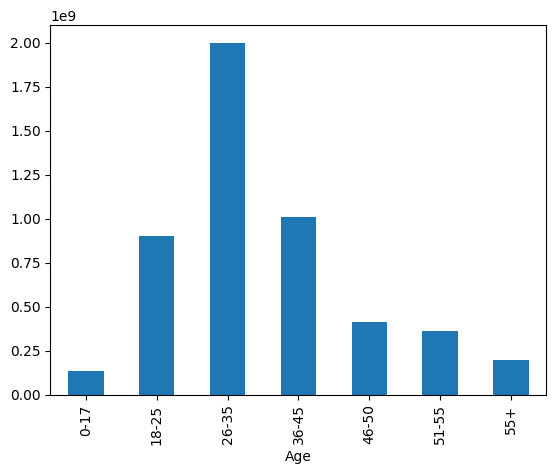

In [18]:
df.groupby('Age').sum()['Purchase'].plot(kind='bar')

In [ ]:
df.groupby('Marital_Status').sum()['Purchase']

In [19]:
for i in df['Age'].unique():
    print(i,":",df[df['Age']==i ]['Product_ID'].nunique())
    

0-17 : 2300
55+ : 2573
26-35 : 3419
46-50 : 3099
51-55 : 2877
36-45 : 3318
18-25 : 3213


<Axes: xlabel='Age', ylabel='count'>

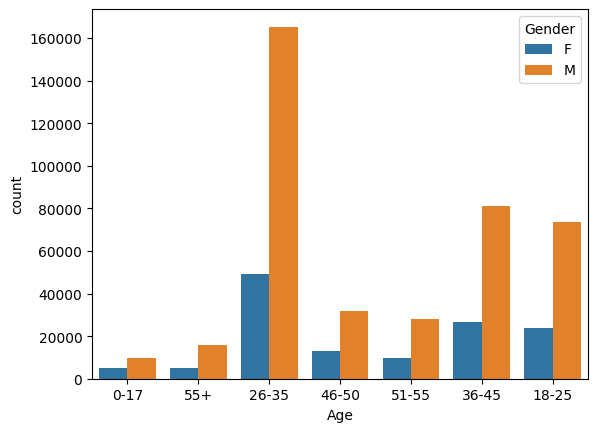

In [57]:
sns.countplot(data=df,x="Age",hue="Gender")

<Axes: xlabel='City_Category', ylabel='count'>

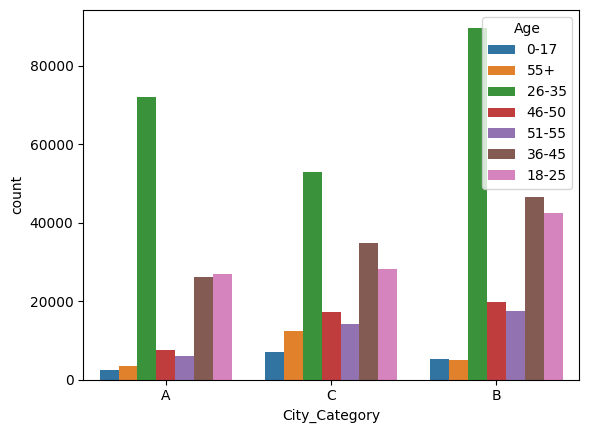

In [58]:
sns.countplot(data=df,x="City_Category",hue="Age")

<Axes: >

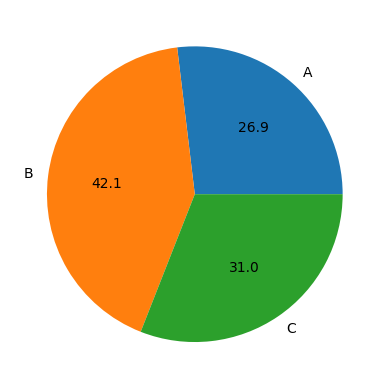

In [59]:
df.groupby('City_Category').size().plot(kind = 'pie', autopct = '%0.1f')

<Axes: ylabel='Purchase'>

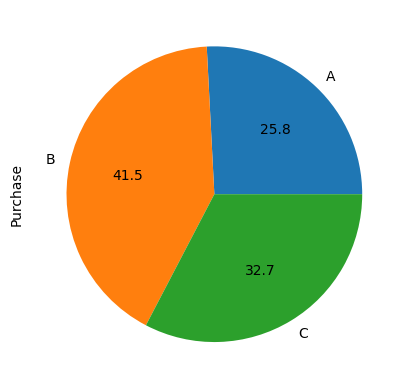

In [60]:
df.groupby('City_Category').sum()['Purchase'].plot(kind = 'pie', autopct = "%0.1f")

In [ ]:
#df.groupby('City_Category').mean()['Purchase'].plot(kind = 'pie', autopct = "%0.1f")

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

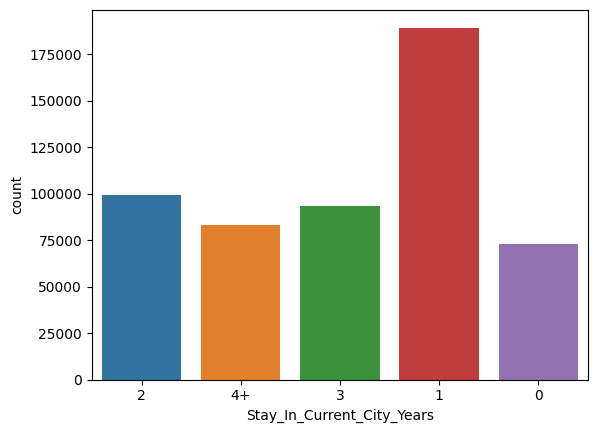

In [63]:
sns.countplot(x = df['Stay_In_Current_City_Years'])

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

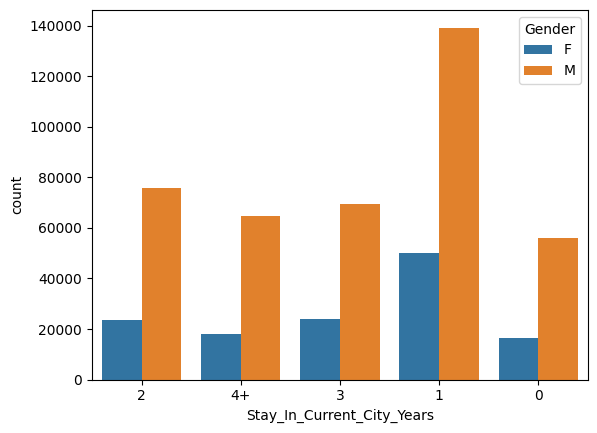

In [64]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'Gender', data = df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

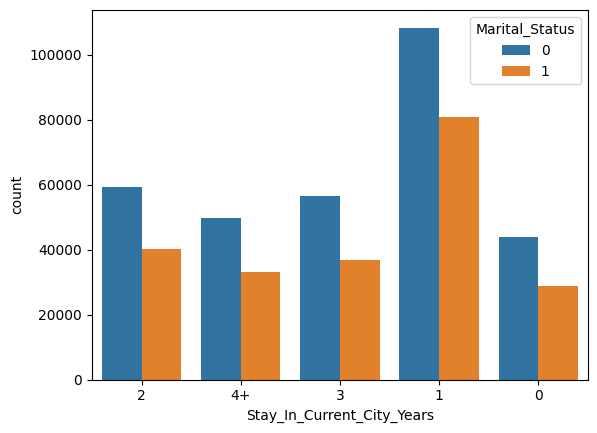

In [65]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'Marital_Status', data = df)

<Axes: xlabel='Occupation', ylabel='count'>

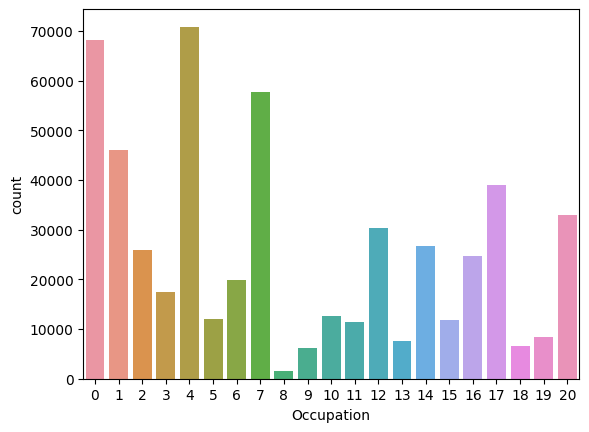

In [66]:
sns.countplot(x=df["Occupation"])

<Axes: xlabel='Occupation'>

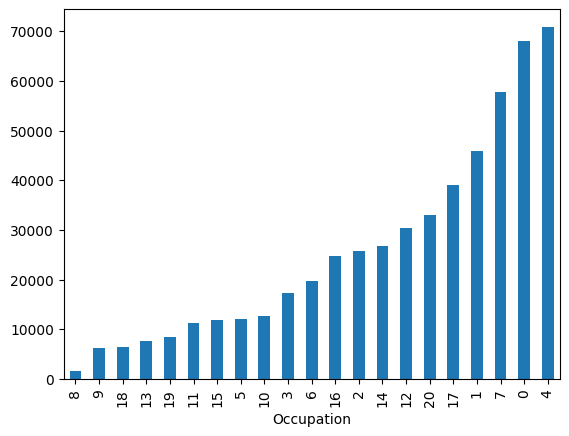

In [68]:
df.groupby('Occupation').size().sort_values().plot(kind="bar")

<Axes: xlabel='Occupation', ylabel='count'>

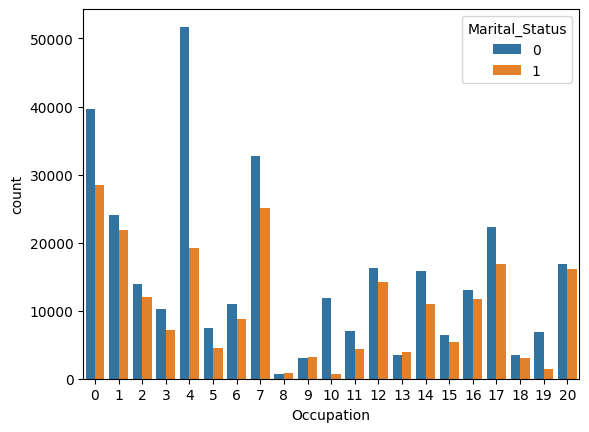

In [69]:
sns.countplot(x = 'Occupation', hue = 'Marital_Status', data = df)

<Axes: xlabel='Product_Category_1'>

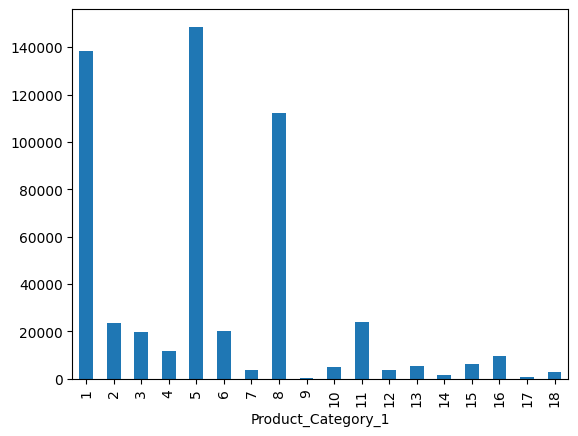

In [36]:
df.groupby('Product_Category_1').size().plot(kind = 'bar')

<Axes: xlabel='Product_ID'>

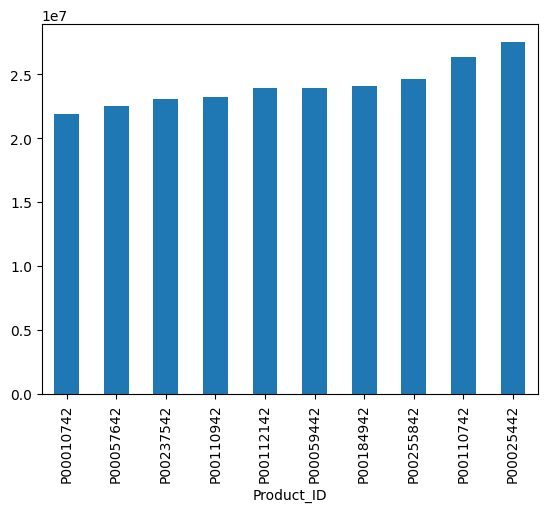

In [37]:
df.groupby('Product_ID').sum()['Purchase'].nlargest(10).sort_values().plot(kind = 'bar')

In [44]:
#combining gender and marital status
l=[]
for i in range(len(df)):
    l.append(df['Gender'][i]+" - "+ str(df["Marital_Status"][i]))
    

In [45]:
df['Marital_gender']=l

In [46]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Marital_gender
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,F - 0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,F - 0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,F - 0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,F - 0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,M - 0


<Axes: xlabel='Marital_gender', ylabel='count'>

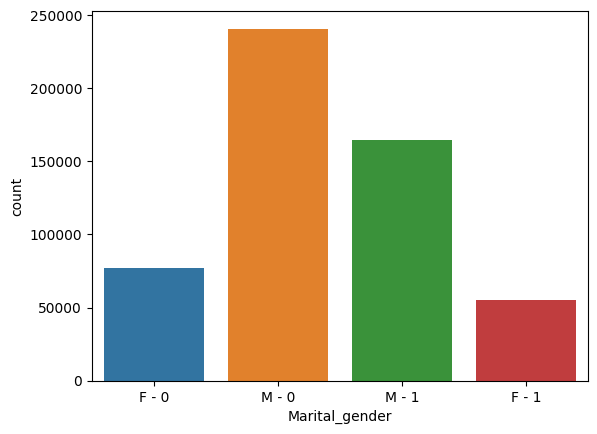

In [48]:
sns.countplot(data=df,x="Marital_gender")

<Axes: xlabel='Product_Category_1', ylabel='count'>

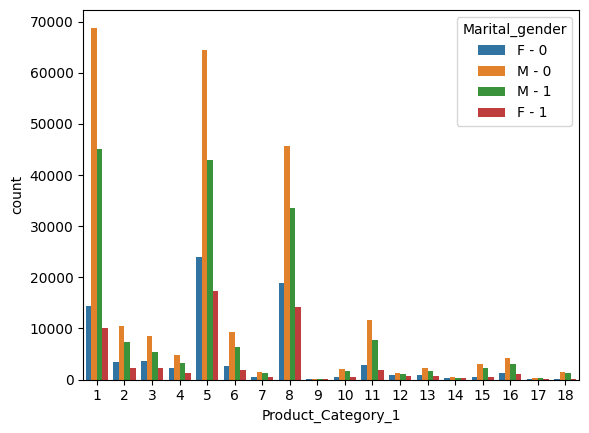

In [51]:
sns.countplot(data=df,x="Product_Category_1",hue="Marital_gender")

<Axes: xlabel='Age', ylabel='count'>

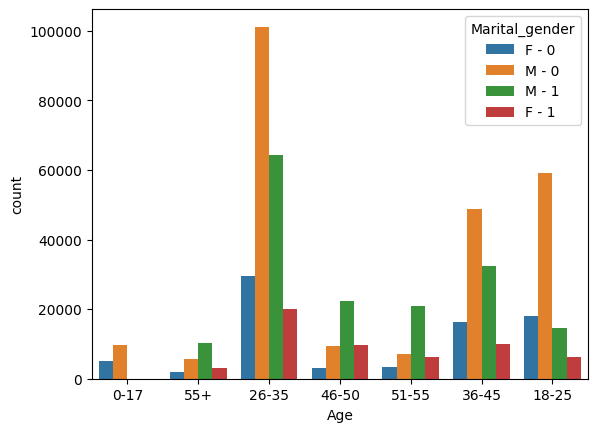

In [52]:
sns.countplot(data=df,x="Age",hue="Marital_gender")

<Axes: xlabel='City_Category', ylabel='count'>

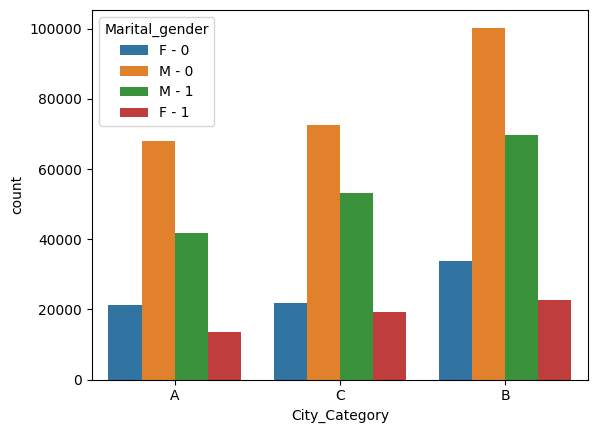

In [53]:
sns.countplot(data=df,x="City_Category",hue="Marital_gender")